<a href="https://colab.research.google.com/github/jogapritam/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Jogapritam_Sahu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***EDA***

In [2]:
# Lets make handshake of note book with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/machine learning/Capstone Regression/NYC Taxi Data.csv')

In [4]:
# Checking dimension of data set 
dataset.shape

(1458644, 11)

In [5]:
# First look of our data 

dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# Checking column names

dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
# Brief description of our data set

dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


* From this description it is visible that trip duration has maximum value of
3526282 seconds and minium 1 second. Converting this into hours it is almost 979.5 hours.
* Here minimum passenger count is 0 and maximum passenger count is 9.



We don't want to keep the data which contains 0 passengers. So drop them.

In [8]:
dataset['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [9]:
# Lets check the taxi wich contains zero passengers

dataset[dataset['passenger_count']==0].count()



id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

The taxi that has zero passengers we don't want to keep those so drop them.

In [10]:
df=dataset[dataset['passenger_count']!=0]
df.shape

(1458584, 11)

In [11]:
# lets check the duplicate
len(df[df.duplicated()])

0

There is no duplicates in our dataset.

In [12]:
#Check for null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There is no null values, which is very good.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458584 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458584 non-null  object 
 1   vendor_id           1458584 non-null  int64  
 2   pickup_datetime     1458584 non-null  object 
 3   dropoff_datetime    1458584 non-null  object 
 4   passenger_count     1458584 non-null  int64  
 5   pickup_longitude    1458584 non-null  float64
 6   pickup_latitude     1458584 non-null  float64
 7   dropoff_longitude   1458584 non-null  float64
 8   dropoff_latitude    1458584 non-null  float64
 9   store_and_fwd_flag  1458584 non-null  object 
 10  trip_duration       1458584 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 133.5+ MB


Here store_and_fwd_flag is a categorical variable and pickup_datatime and dropoff_datetime are in string format so it's better to convert them into datetime format.

In [14]:
df['pickup_datetime'][0]

'2016-03-14 17:24:55'

In [15]:
#Converting to date time format
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Let's check for outliers

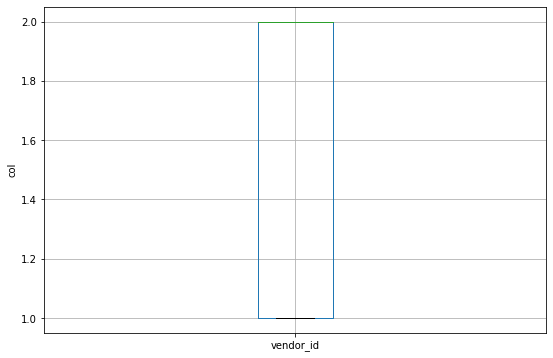

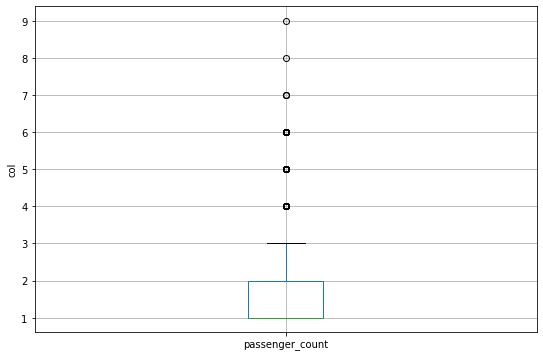

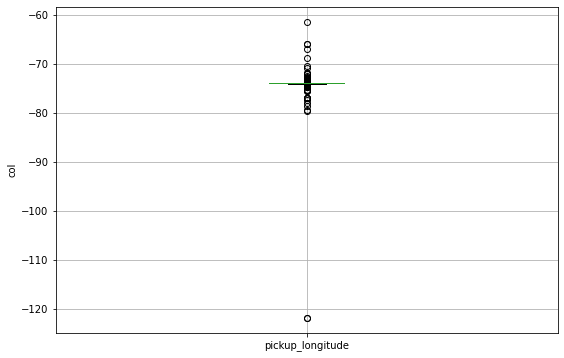

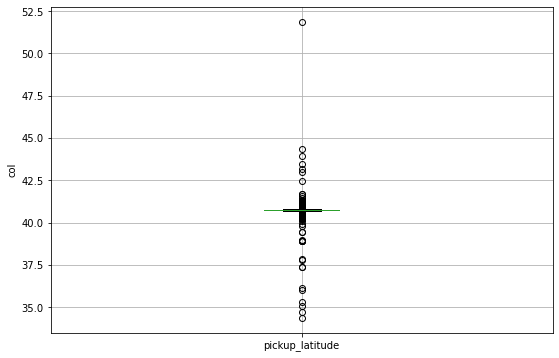

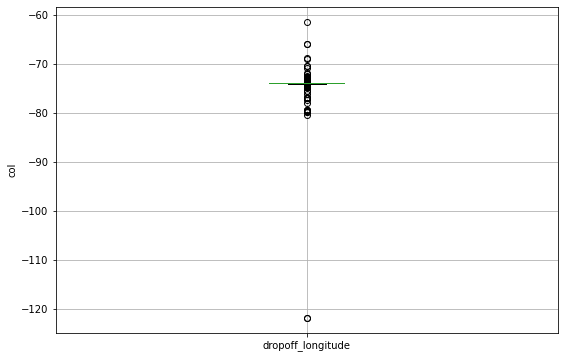

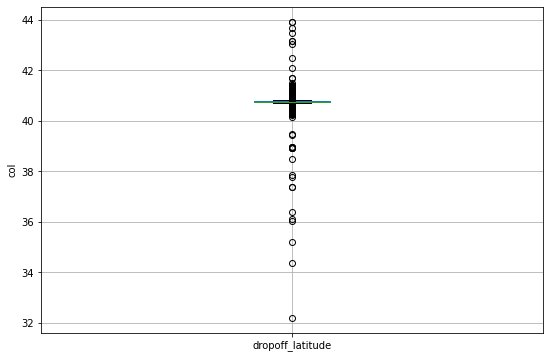

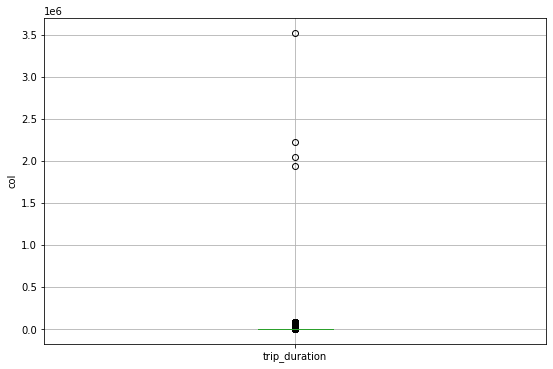

In [16]:
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = col, ax = ax)
    ax.set_ylabel("col")
plt.show()

Here it is visible that a lot of outliers are here. So we have to drop these outliers.

In [17]:
from collections import Counter
n = 1
indexes = []

for col in df.describe().columns:
  Q1 = np.percentile(df[col],25)
  Q3 = np.percentile(df[col],75)
  IQR = Q3 - Q1

  limit = 1.5 * IQR

  list_outliers = df[(df[col] < Q1 - limit) | (df[col] > Q3 + limit)].index

  indexes.extend(list_outliers)

indexes = Counter(indexes)
multiple_outliers = list(k for k, v in indexes.items() if v > n)

In [18]:
df.drop(multiple_outliers, axis = 0)
df = df.drop(multiple_outliers, axis=0).reset_index(drop=True)

In [19]:
df.shape

(1347057, 11)

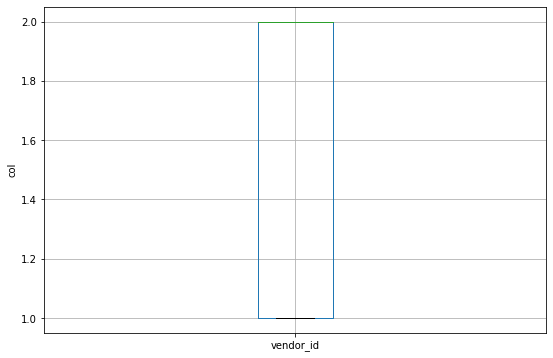

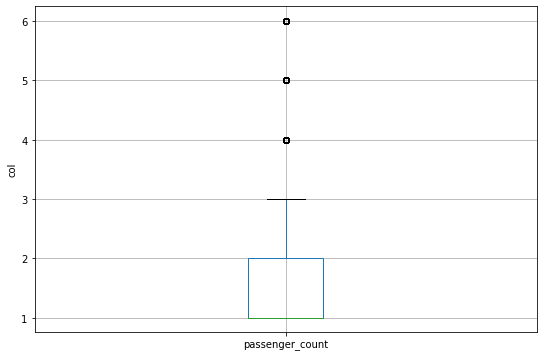

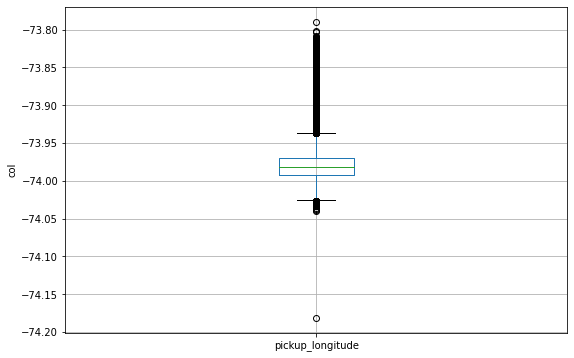

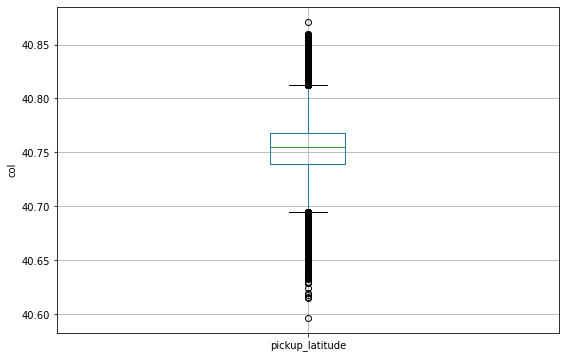

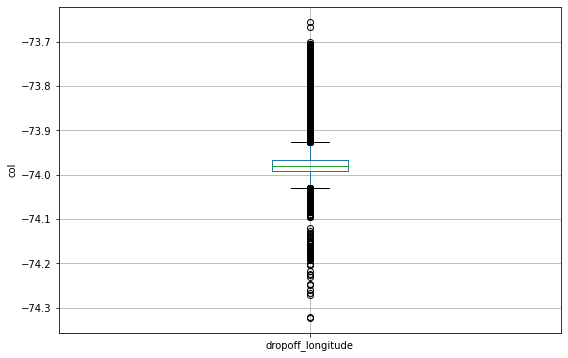

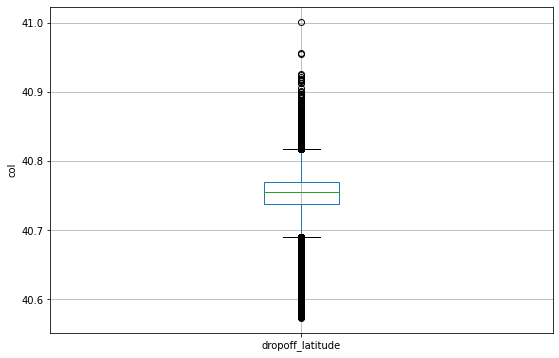

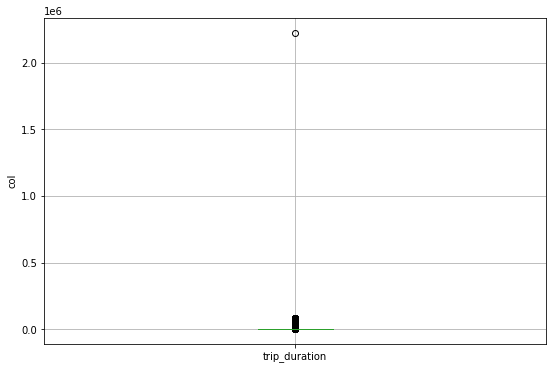

In [20]:
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = col, ax = ax)
    ax.set_ylabel("col")
plt.show()

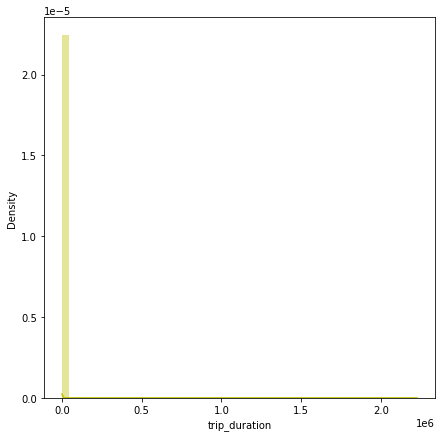

In [21]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'],color="y")

Dependent Variable is not normally distributed. So apply log transformation to normalize.

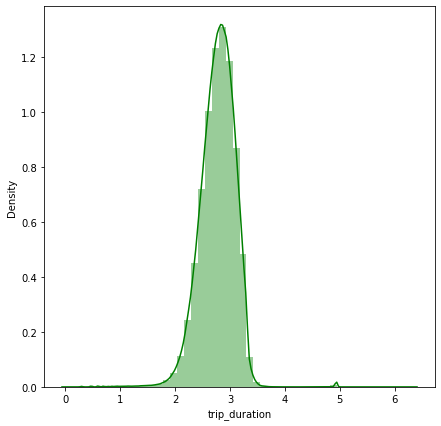

In [22]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['trip_duration']),color="g")

In [23]:
# let's check the numerical features
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

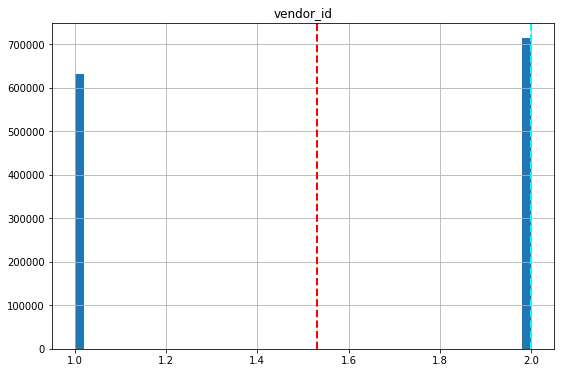

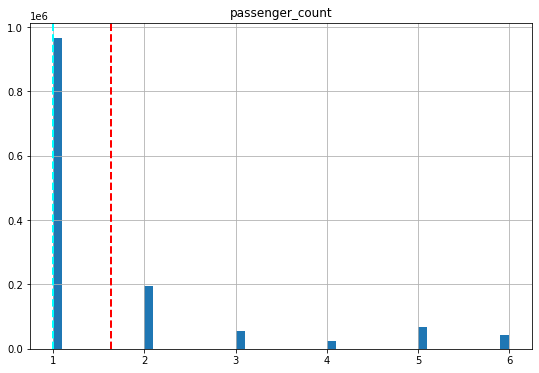

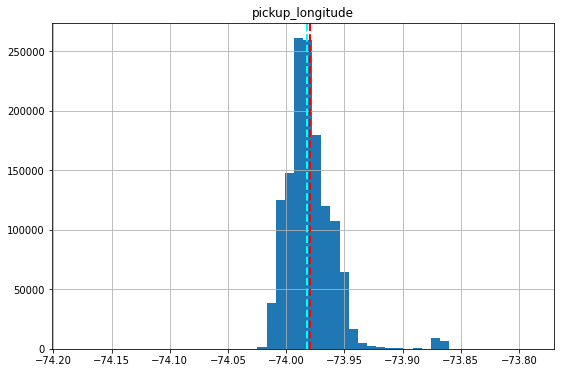

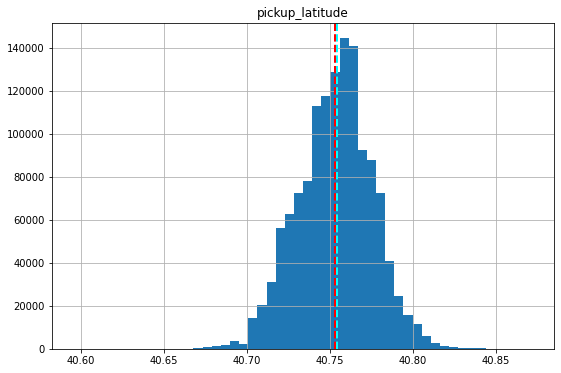

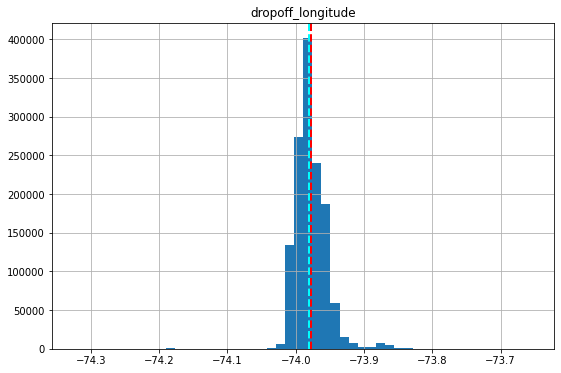

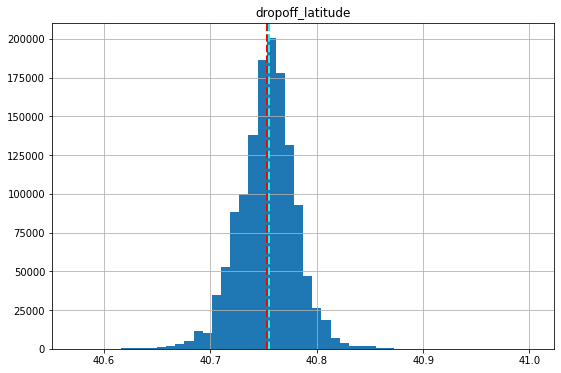

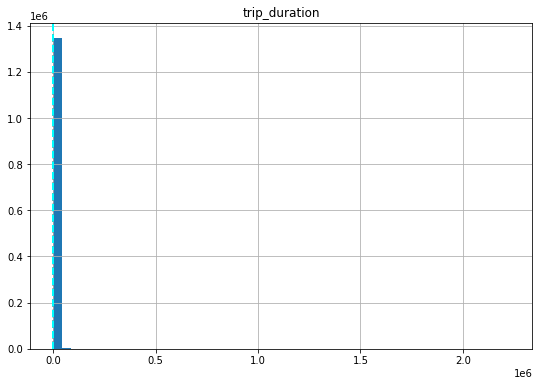

In [24]:
# plot a bar plot for each numerical feature count to check how normally our features are distributed

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

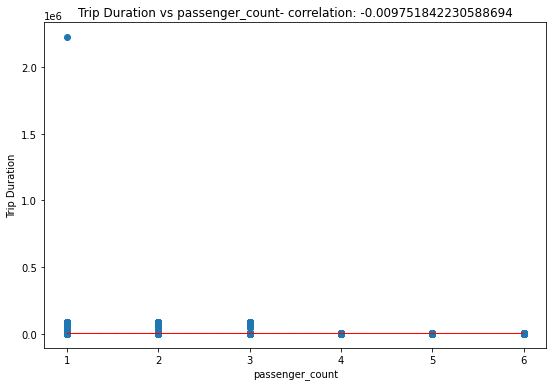

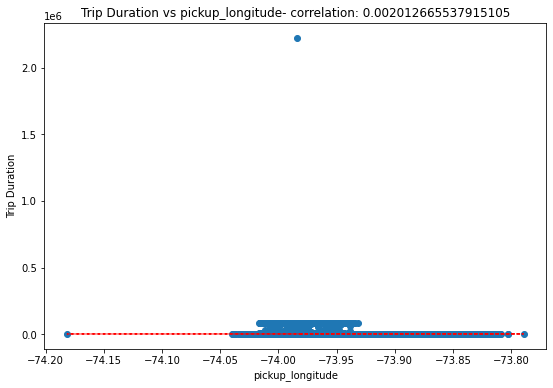

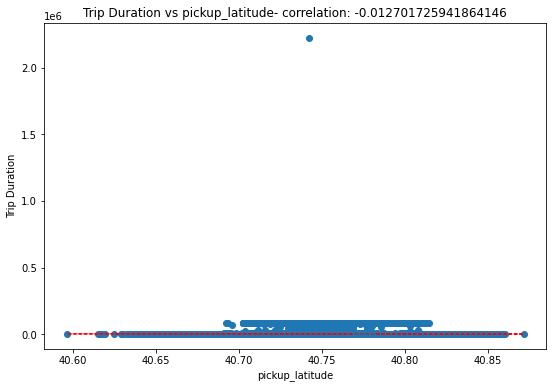

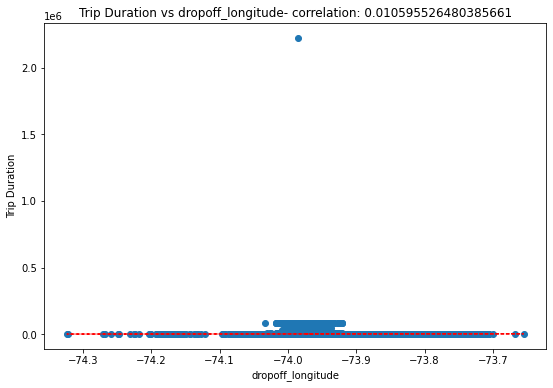

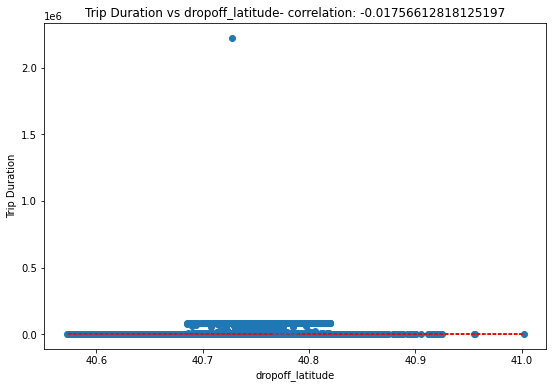

In [25]:
#Let's plot scatter plot to gain a good understanding about our features

for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip Duration')
    ax.set_title('Trip Duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

    

plt.show()

# ***Feature Engineering***

Now from pickup date time and dropoff date time we will create two new columns as pickup day and dropoff day

In [26]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Now check day wise trips

In [27]:
df['pickup_day'].value_counts()

Saturday     206464
Friday       206187
Thursday     201261
Wednesday    194686
Tuesday      187727
Sunday       179100
Monday       171632
Name: pickup_day, dtype: int64

In [28]:
df['dropoff_day'].value_counts()

Saturday     206382
Friday       205728
Thursday     200627
Wednesday    194377
Tuesday      187490
Sunday       180848
Monday       171605
Name: dropoff_day, dtype: int64

let's plot the number of pickups and number of dropoffs each day

Text(0.5, 1.0, 'Day Wise Number Of dropoffs')

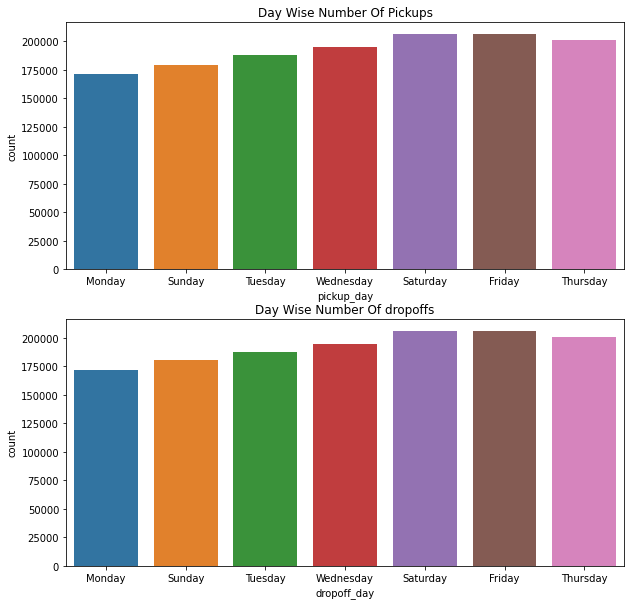

In [29]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Day Wise Number Of Pickups')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Day Wise Number Of dropoffs')

Lets create two more columns which will include coressponding months.

In [30]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [31]:
df['pickup_month'].value_counts()

3    237409
4    232799
5    227164
2    222208
6    214296
1    213181
Name: pickup_month, dtype: int64

In [32]:
df['dropoff_month'].value_counts()

3    237369
4    232788
5    227222
2    222195
6    214240
1    213151
7        92
Name: dropoff_month, dtype: int64

Let's Check month wise pickups with number of passengers.

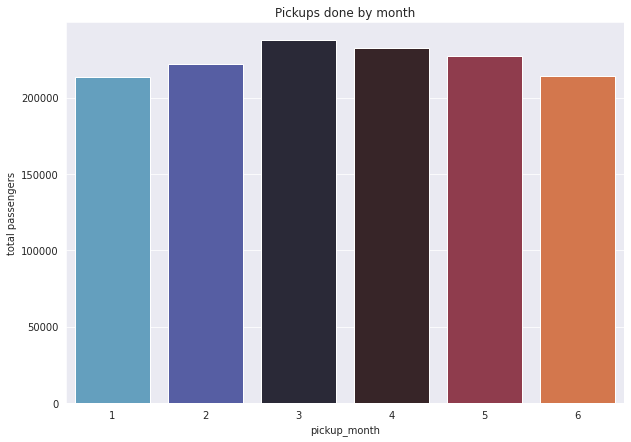

In [33]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='pickup_month',data=df,palette="icefire")
plt.title('Pickups done by month')
plt.ylabel("total passengers")
plt.show()

Let's check the distribution of store and forward flag. 

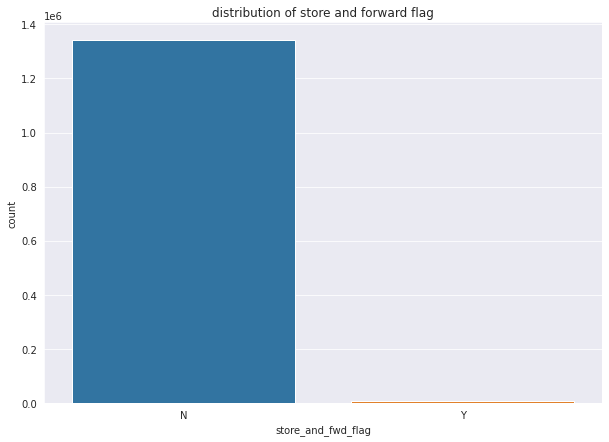

In [34]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='store_and_fwd_flag',data=df)
plt.title('distribution of store and forward flag')
plt.show()

This is indicating that very few umber of trip record was held in vehicle memory before sending to the vendor.

Let's calculate distance using given latitude and longitude

In [35]:
# vectorized haversine function
from math import cos, sin, asin, sqrt, radians
def haversine(df):
    
        lat1, lon1, lat2, lon2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude

        R = 3959.87433 #miles value

        dlat=radians(lat2-lat1)
        dlon=radians(lon2-lon1)
        lat1=radians(lat1)
        lat2=radians(lat2)

        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2

        return R * 2 * asin(np.sqrt(a))


In [36]:
df['distance']=df.apply(lambda x:haversine(x),axis = 1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,0.931401
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,1.122207
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,3.968637
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,0.923307
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,0.738763


In [37]:
# Now check the number of rows that contains 0 distance
len(df[df.distance==0])

4169

In [38]:
# drop them
df=df[df['distance']!=0]
df.shape

(1342888, 16)

We know that trip duration depends on distance as well as speed of vehicle. So create a column which will include Speed.

In [39]:
df['trip_duration_hour']=df['trip_duration']/3600

In [40]:
df['Speed']=df['distance']/df['trip_duration_hour']
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,distance,trip_duration_hour,Speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,0.931401,0.126389,7.369324
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,1.122207,0.184167,6.093432
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,3.968637,0.590000,6.726504
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,0.923307,0.119167,7.748028
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,0.738763,0.120833,6.113903


Let's make a graph between distance and dependent variable 'trip_duration_hour'

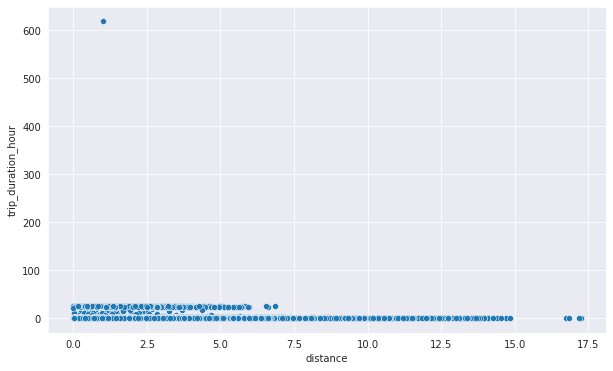

In [41]:
figure,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='distance',y='trip_duration_hour',data=df)

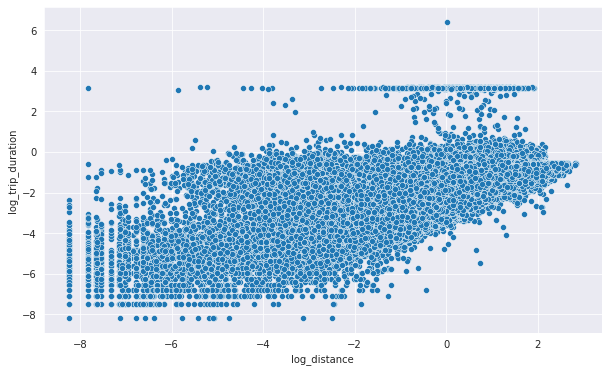

In [42]:
#Check using normalized data of both of them
df['log_trip_duration']=np.log(df.trip_duration_hour)
df['log_distance']=np.log(df.distance)
figure,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [43]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'distance', 'trip_duration_hour', 'Speed',
       'log_trip_duration', 'log_distance'],
      dtype='object')

# **Linear Regression**

In [44]:
reg_df = df.copy()

In [45]:
reg_df=reg_df[['vendor_id','pickup_datetime','dropoff_datetime','passenger_count','store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','distance','trip_duration_hour','Speed']]

In [46]:
reg_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,pickup_day,dropoff_day,pickup_month,dropoff_month,distance,trip_duration_hour,Speed
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,Monday,Monday,3,3,0.931401,0.126389,7.369324
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,Sunday,Sunday,6,6,1.122207,0.184167,6.093432
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,Tuesday,Tuesday,1,1,3.968637,0.590000,6.726504
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,Wednesday,Wednesday,4,4,0.923307,0.119167,7.748028
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,Saturday,Saturday,3,3,0.738763,0.120833,6.113903


In [47]:
#Let's do one hot encoding for categorical variables
reg_df = pd.get_dummies(reg_df, columns = ['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month'])
reg_df.head()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,distance,trip_duration_hour,Speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,0.931401,0.126389,7.369324,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,1.122207,0.184167,6.093432,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,3.968637,0.590000,6.726504,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,0.923307,0.119167,7.748028,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,0.738763,0.120833,6.113903,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [48]:
reg_df.corr()

,vendor_id,passenger_count,distance,trip_duration_hour,Speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
vendor_id,1.000000,0.281247,-0.011766,0.022324,-0.004531,0.075405,-0.075405,-0.001178,-0.000690,0.000830,0.002912,-0.001766,0.001656,-0.001641,-0.001218,-0.000570,0.000598,0.003257,-0.001939,0.001448,-0.001448,0.004827,0.002702,0.001662,-0.002604,-0.002616,-0.003920,0.004798,0.002690,0.001718,-0.002625,-0.002623,-0.003898,-0.000497
passenger_count,0.281247,1.000000,-0.044059,-0.009810,-0.028286,0.020670,-0.020670,-0.001070,-0.009090,0.022403,0.015077,-0.008671,-0.009212,-0.009931,-0.001213,-0.009071,0.022149,0.015512,-0.008690,-0.009263,-0.009976,0.003542,-0.000409,-0.000623,0.001189,-0.001256,-0.002413,0.003567,-0.000418,-0.000635,0.001204,-0.001253,-0.002389,-0.002121
distance,-0.011766,-0.044059,1.000000,0.094185,0.496350,-0.014998,0.014998,-0.008163,0.000035,0.007639,0.040779,-0.010054,-0.015029,-0.013883,-0.008092,-0.000187,0.007914,0.041926,-0.010697,-0.015146,-0.014573,-0.006106,-0.006078,0.004404,0.002357,0.004064,0.001075,-0.006205,-0.006060,0.004351,0.002405,0.004074,0.001029,0.005324
trip_duration_hour,0.022324,-0.009810,0.094185,1.000000,-0.067004,0.000030,-0.000030,0.003097,-0.007292,-0.000640,-0.006133,0.004762,0.002925,0.002612,0.001369,-0.002648,-0.002790,-0.001589,0.003291,-0.001430,0.003587,-0.003048,-0.003802,-0.002215,0.001438,0.003202,0.004443,-0.003423,-0.003756,-0.002368,0.001442,0.003519,0.004170,0.019048
Speed,-0.004531,-0.028286,0.496350,-0.067004,1.000000,-0.003084,0.003084,-0.036793,0.029130,0.035721,0.120025,-0.054549,-0.037691,-0.050023,-0.035711,0.028935,0.036063,0.117728,-0.054277,-0.037446,-0.050214,0.020746,0.008832,0.011677,-0.009612,-0.012461,-0.019137,0.020718,0.008830,0.011703,-0.009562,-0.012526,-0.019103,-0.000602
store_and_fwd_flag_N,0.075405,0.020670,-0.014998,0.000030,-0.003084,1.000000,-1.000000,-0.001161,-0.001115,0.001776,0.003442,-0.002023,-0.000308,-0.000542,-0.000995,-0.000994,0.001910,0.003235,-0.002386,-0.000345,-0.000379,-0.000976,-0.000297,0.001567,-0.000738,0.001814,-0.001452,-0.000980,-0.000271,0.001534,-0.000711,0.001794,-0.001460,0.000588
store_and_fwd_flag_Y,-0.075405,-0.020670,0.014998,-0.000030,0.003084,-1.000000,1.000000,0.001161,0.001115,-0.001776,-0.003442,0.002023,0.000308,0.000542,0.000995,0.000994,-0.001910,-0.003235,0.002386,0.000345,0.000379,0.000976,0.000297,-0.001567,0.000738,-0.001814,0.001452,0.000980,0.000271,-0.001534,0.000711,-0.001794,0.001460,-0.000588
pickup_day_Friday,-0.001178,-0.001070,-0.008163,0.003097,-0.036793,-0.001161,0.001161,1.000000,-0.162467,-0.180866,-0.166474,-0.178156,-0.171052,-0.174742,0.985495,-0.162450,-0.165031,-0.167413,-0.177826,-0.170926,-0.174581,0.033259,-0.005592,-0.018227,0.026315,-0.020493,-0.014748,0.033287,-0.005581,-0.018195,0.026325,-0.020540,-0.014702,-0.003519
pickup_day_Monday,-0.000690,-0.009090,0.000035,-0.007292,0.029130,-0.001115,0.001115,-0.162467,1.000000,-0.162597,-0.149659,-0.160161,-0.153774,-0.157092,-0.162255,0.992606,-0.162557,-0.150502,-0.159863,-0.146435,-0.156946,-0.014056,0.030521,-0.015632,-0.013055,0.019656,-0.007288,-0.014034,0.030273,-0.015351,-0.013047,0.019610,-0.007245,-0.003163
pickup_day_Saturday,0.000830,0.022403,0.007639,-0.000640,0.035721,0.001776,-0.001776,-0.180866,-0.162597,1.000000,-0.166607,-0.178298,-0.171188,-0.174882,-0.180630,-0.162579,0.983974,-0.150358,-0.177968,-0.171062,-0.174720,-0.000453,0.001290,-0.011170,0.039066,-0.015353,-0.013888,-0.000427,0.001301,-0.011138,0.038562,-0.014882,-0.013841,-0.003522


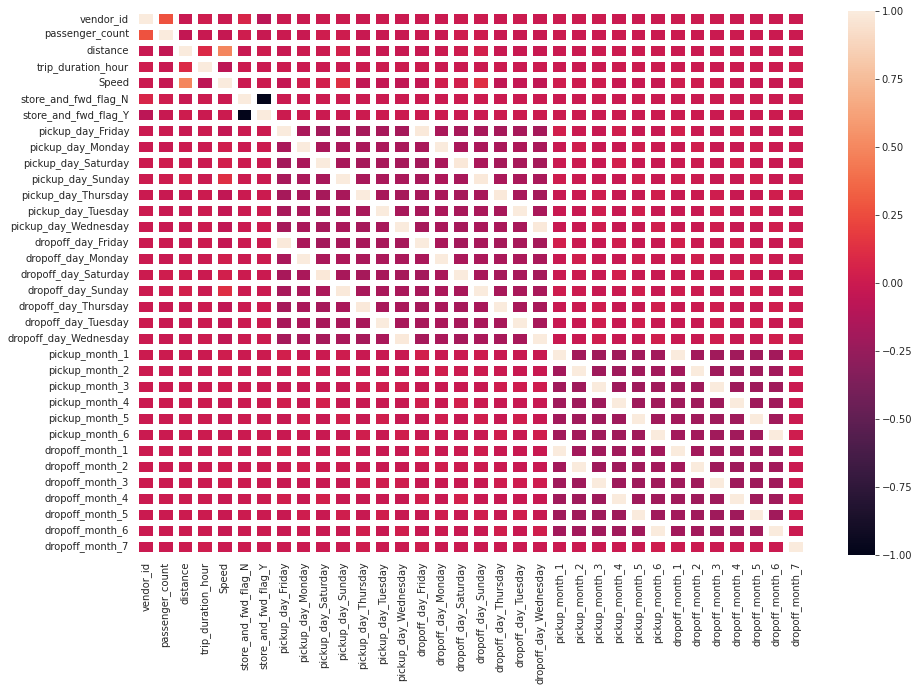

In [49]:
#Check in heatmap
plt.figure (figsize=(15,10))
sns.heatmap(reg_df.corr(),linewidths=5)

In [50]:
final_df = reg_df.copy()
features = ['vendor_id', 'passenger_count', 'distance',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_day_Friday', 'pickup_day_Monday', 'pickup_day_Saturday',
       'pickup_day_Sunday', 'pickup_day_Thursday', 'pickup_day_Tuesday',
       'pickup_day_Wednesday', 'dropoff_day_Friday', 'dropoff_day_Monday',
       'dropoff_day_Saturday', 'dropoff_day_Sunday', 'dropoff_day_Thursday',
       'dropoff_day_Tuesday', 'dropoff_day_Wednesday', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'dropoff_month_1', 'dropoff_month_2',
       'dropoff_month_3', 'dropoff_month_4', 'dropoff_month_5',
       'dropoff_month_6', 'dropoff_month_7']

In [51]:
from scipy.stats import zscore
X = final_df[features].apply(zscore)

In [52]:
X

,vendor_id,passenger_count,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
0,0.941757,-0.494676,-0.527237,0.071013,-0.071013,-0.425114,2.616615,-0.425453,-0.391599,-0.419079,-0.402367,-0.411048,-0.424559,2.616896,-0.425349,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,2.161810,-0.457103,-0.450422,-0.434879,-0.433538,-0.444456,2.162032,-0.457090,-0.450491,-0.434811,-0.008277
1,-1.061845,-0.494676,-0.392954,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,2.553631,-0.419079,-0.402367,-0.411048,-0.424559,-0.382132,-0.425349,2.539314,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,-0.462575,-0.457103,-0.450422,2.299492,-0.433538,-0.444456,-0.462528,-0.457090,-0.450491,2.299851,-0.008277
2,0.941757,-0.494676,1.610254,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,-0.391599,-0.419079,2.485295,-0.411048,-0.424559,-0.382132,-0.425349,-0.393807,-0.418301,2.487125,-0.410668,2.306411,-0.444472,-0.462575,-0.457103,-0.450422,-0.434879,2.306605,-0.444456,-0.462528,-0.457090,-0.450491,-0.434811,-0.008277
3,0.941757,-0.494676,-0.532933,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,-0.391599,-0.419079,-0.402367,2.432804,-0.424559,-0.382132,-0.425349,-0.393807,-0.418301,-0.402071,2.435056,-0.433574,-0.444472,-0.462575,2.187691,-0.450422,-0.434879,-0.433538,-0.444456,-0.462528,2.187753,-0.450491,-0.434811,-0.008277
4,0.941757,-0.494676,-0.662807,0.071013,-0.071013,-0.425114,-0.382173,2.350435,-0.391599,-0.419079,-0.402367,-0.411048,-0.424559,-0.382132,2.351008,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,2.161810,-0.457103,-0.450422,-0.434879,-0.433538,-0.444456,2.162032,-0.457090,-0.450491,-0.434811,-0.008277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347052,0.941757,1.855767,-0.646845,0.071013,-0.071013,2.352311,-0.382173,-0.425453,-0.391599,-0.419079,-0.402367,-0.411048,2.355383,-0.382132,-0.425349,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,-0.462575,2.187691,-0.450422,-0.434879,-0.433538,-0.444456,-0.462528,2.187753,-0.450491,-0.434811,-0.008277
1347053,-1.061845,-0.494676,1.463603,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,2.553631,-0.419079,-0.402367,-0.411048,-0.424559,-0.382132,-0.425349,2.539314,-0.418301,-0.402071,-0.410668,2.306411,-0.444472,-0.462575,-0.457103,-0.450422,-0.434879,2.306605,-0.444456,-0.462528,-0.457090,-0.450491,-0.434811,-0.008277
1347054,0.941757,-0.494676,2.239925,0.071013,-0.071013,2.352311,-0.382173,-0.425453,-0.391599,-0.419079,-0.402367,-0.411048,2.355383,-0.382132,-0.425349,-0.393807,-0.418301,-0.402071,-0.410668,-0.433574,-0.444472,-0.462575,2.187691,-0.450422,-0.434879,-0.433538,-0.444456,-0.462528,2.187753,-0.450491,-0.434811,-0.008277
1347055,-1.061845,-0.494676,-0.704811,0.071013,-0.071013,-0.425114,-0.382173,-0.425453,-0.391599,-0.419079,2.485295,-0.411048,-0.424559,-0.382132,-0.425349,-0.393807,-0.418301,2.487125,-0.410668,2.306411,-0.444472,-0.462575,-0.457103,-0.450422,-0.434879,2.306605,-0.444456,-0.462528,-0.457090,-0.450491,-0.434811,-0.008277


In [53]:
y = np.log10(df['trip_duration_hour'])

In [54]:
y

0         -0.898291
1         -0.734789
2         -0.229148
3         -0.923845
4         -0.917813
             ...   
1347052   -0.665323
1347053   -0.740061
1347054   -0.673209
1347055   -0.984594
1347056   -1.259637
Name: trip_duration_hour, Length: 1342888, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1074310, 32)
(268578, 32)


In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [57]:
reg.score(X_train, y_train)

0.39116334692347876

In [58]:
reg.coef_

array([ 2.19461604e-03,  4.78054651e-03,  1.93549334e-01, -1.05898663e+11,
       -1.05898663e+11, -3.18877795e+10, -2.95338985e+10, -3.19054365e+10,
       -3.00709614e+10, -3.15713087e+10, -3.06704616e+10, -3.11429346e+10,
        1.69585790e+11,  1.57197192e+11,  1.69804778e+11,  1.60729378e+11,
        1.67836075e+11,  1.63173004e+11,  1.65665666e+11,  3.98349368e+10,
        4.05098814e+10,  4.15895972e+10,  4.12686759e+10,  4.08704720e+10,
        3.99167273e+10,  2.11797318e+11,  2.15393188e+11,  2.21124613e+11,
        2.19428792e+11,  2.17337762e+11,  2.12221788e+11,  4.80344373e+09])

In [59]:
y_pred = reg.predict(X_test)

In [60]:
y_pred

array([-0.76831121, -0.89923162, -0.96929998, ..., -0.90625066,
       -0.80670232, -0.65937415])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.5566091323022827
RMSE : 0.7460624185028238


In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : -0.028457030593883825
Adjusted R2 :  -0.028579582214576904


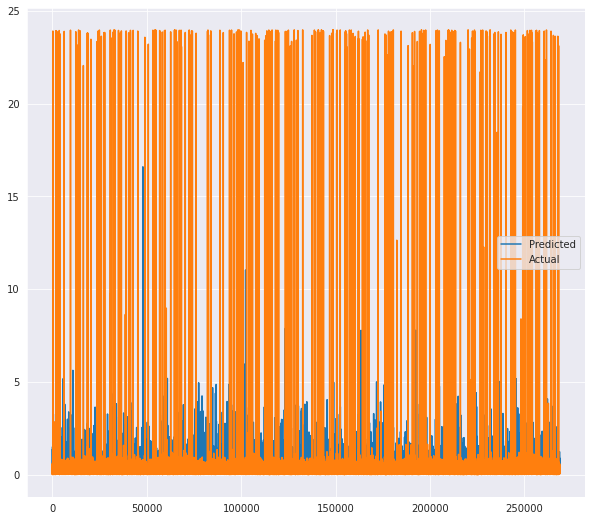

In [62]:
plt.figure(figsize=(10,9))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# ***Apply lasso to our model***

In [63]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [64]:
lasso.score(X_train, y_train)

0.39082967809040714

In [65]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.05931561329684537


In [67]:
y_pred_lasso = lasso_regressor.predict(X_test)

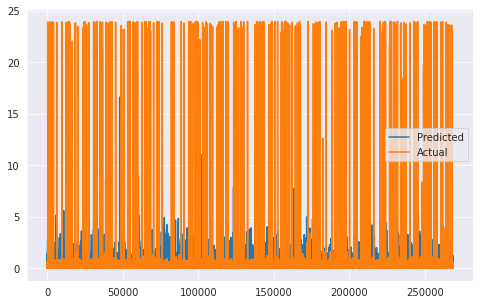

In [68]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [69]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.5568330478978979
RMSE : 0.7462124683345206
R2 : -0.028870763598258797
Adjusted R2 :  -0.02899336451965051


# ***Apply ridge to our model***

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [71]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.059303221388723536


In [72]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [73]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.5566327065207172
RMSE : 0.7460782174281174
R2 : -0.02850058911508424
Adjusted R2 :  -0.0286231459262396


# ***Applying XGBRegressor algorithem***

In [74]:
# Import required libraries for applying XGBoosting to our model
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost import plot_importance

In [75]:
xgb_df = df.copy()

In [76]:
xgb_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'distance', 'trip_duration_hour', 'Speed',
       'log_trip_duration', 'log_distance'],
      dtype='object')

In [77]:
#week number of the year
xgb_df['pickup_week'] = xgb_df.pickup_datetime.dt.week

#week day number - starts with monday = 0
xgb_df['pickup_day'] = xgb_df.pickup_datetime.dt.weekday



In [78]:
#get rid of the columns that we don't need
xgb_df.drop(columns=['id','pickup_datetime', 'dropoff_datetime','trip_duration_hour', 'Speed',
       'log_trip_duration', 'log_distance','dropoff_month','dropoff_day'],inplace=True)

In [79]:
#create dummy variables for required variables 
xgb_df = pd.get_dummies(xgb_df,columns =['vendor_id','store_and_fwd_flag'],
                        prefix=["vendor","flag"])

In [80]:
xgb_df.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'pickup_month', 'distance', 'pickup_week', 'vendor_1', 'vendor_2',
       'flag_N', 'flag_Y'],
      dtype='object')

In [81]:
features_xgb = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_day',
       'pickup_month', 'distance', 'pickup_week', 'vendor_1', 'vendor_2',
       'flag_N', 'flag_Y']

In [82]:
xgb_df['trip_duration'] = np.log(xgb_df['trip_duration'].values)

In [83]:
#features
X_xgb = np.array(xgb_df[features_xgb])

In [84]:
#target
y_xgb = np.array(xgb_df['trip_duration'])

In [85]:
# Let's do train test split

X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split( X_xgb,y_xgb , test_size = 0.20, random_state = 123) 
print(X_xgb_train.shape)
print(X_xgb_test.shape)

(1074310, 13)
(268578, 13)


In [86]:
model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=25,subsample=0.8,eta=0.09)
model.fit(X_xgb_train, y_xgb_train)

XGBRegressor(eta=0.09, max_depth=25, objective='reg:squarederror',
             subsample=0.8)

Running our XGBoosting model with hyperparameters - maximum tree depth at 25, sub sampling i.e. the fraction of observations to be randomly samples for each tree keeping at 80% and eta value i.e. learning rate was kept at 0.09.

In [87]:
#predicting on the test split
y_xgb_pred = model.predict(X_xgb_test)

In [88]:
# Check root mean squared error value 
rmse = np.sqrt(metrics.mean_squared_error((y_xgb_test),(y_xgb_pred)))
print(f'Root mean squared error for our XGBoost model is:\n\n{rmse}')

Root mean squared error for our XGBoost model is:

0.42081175275834587


Here root mean squared error value is 0.42, which is good.

In [89]:
#R2 score
print(f'R2 score for our XGBoost model is:\n\n{r2_score(y_xgb_test,y_xgb_pred)}')

R2 score for our XGBoost model is:

0.6571888400028727


It is clearly visible that 65% of our observed data hasa been able to fit by our model.

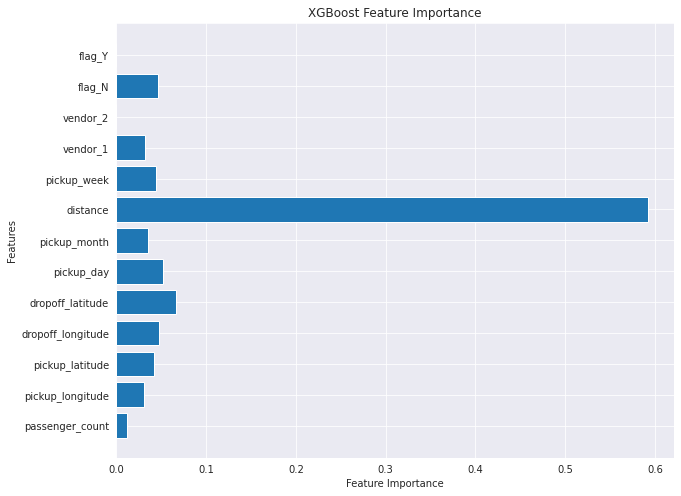

In [90]:
# Check our feature importances

plt.figure(figsize=(10,8))
plt.barh(features_xgb, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

From this plot it is clearly visible that distance is the most important feature to predict the trip duration with almost 58% contribution followed by dropoff latitude, pickup day, pickup week, dropoff longitude and so on.Also it is visible that Vendors and flags have almost neglible contribution to predict trip duration.

# ***Applying Random Forest Algorithm***

In [91]:
#Import required libraries to run the random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from matplotlib import pyplot

In [92]:
rf_df = df.copy()

In [93]:
#week number of the year
rf_df['pickup_week'] = rf_df.pickup_datetime.dt.week

#week day number starts with monday = 0
rf_df['pickup_day'] = rf_df.pickup_datetime.dt.weekday

In [94]:
# Check the column names
rf_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'distance', 'trip_duration_hour', 'Speed',
       'log_trip_duration', 'log_distance', 'pickup_week'],
      dtype='object')

In [95]:
#drop the columns which are not necessary
rf_df.drop(columns=['id','pickup_datetime', 'dropoff_datetime','trip_duration_hour', 'Speed',
       'log_trip_duration', 'log_distance','dropoff_month','dropoff_day'],inplace=True)

In [96]:
#create dummy variables for required variables 
rf_df = pd.get_dummies(rf_df,columns =['vendor_id','store_and_fwd_flag'],
                        prefix=["vendor","flag"])

In [97]:
rf_df.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'pickup_month', 'distance', 'pickup_week', 'vendor_1', 'vendor_2',
       'flag_N', 'flag_Y'],
      dtype='object')

In [98]:
#list of features to be used for training and testing 

features_rf = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_day',
       'pickup_month', 'distance', 'pickup_week', 'vendor_1', 'vendor_2',
       'flag_N', 'flag_Y']

In [ ]:
rf_df['trip_duration'] = np.log(rf_df['trip_duration'].values)

In [99]:
X_rf = np.array(rf_df[features_rf])

In [100]:
y_rf = np.array(rf_df['trip_duration'])

In [101]:
#train test split of the model in 80:20 ratio

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split( X_rf,y_rf , test_size = 0.20, random_state = 123) 
print(X_rf_train.shape)
print(X_rf_test.shape)

(1074310, 13)
(268578, 13)


In [102]:
# Let's fit our model

reg = RandomForestRegressor(max_depth=20,max_samples=0.8,n_estimators=80,n_jobs=-1)
reg.fit(X_rf_train, y_rf_train)

RandomForestRegressor(max_depth=20, max_samples=0.8, n_estimators=80, n_jobs=-1)

Running our random forest model with-maximum tree depth of 20. 80 percent of the original dataset was given to any individual tree by using the max_samples and number of estimators was 80.

In [103]:
#let's predict on the test split
y_rf_pred = reg.predict(X_rf_test)

In [104]:
#check root mean squared error value
rmse = np.sqrt(metrics.mean_squared_error((y_rf_test),(y_rf_pred)))
print(f'Root mean squared error for our Random Forest model is:\n\n{rmse}')

Root mean squared error for our Random Forest model is:

2856.6961785413855


Here rmse value is 0.42.

In [105]:
#R2 score
print(f'R2 score for our Random Forest model is:\n\n{r2_score(y_rf_test,y_rf_pred)}')

R2 score for our Random Forest model is:

-0.05947168285872473


Here R2 score is not that much good.

In [106]:
%%capture
pip install graphviz

In [107]:
import graphviz
from sklearn.tree import export_graphviz

Let's check feature importances of our random forest model.

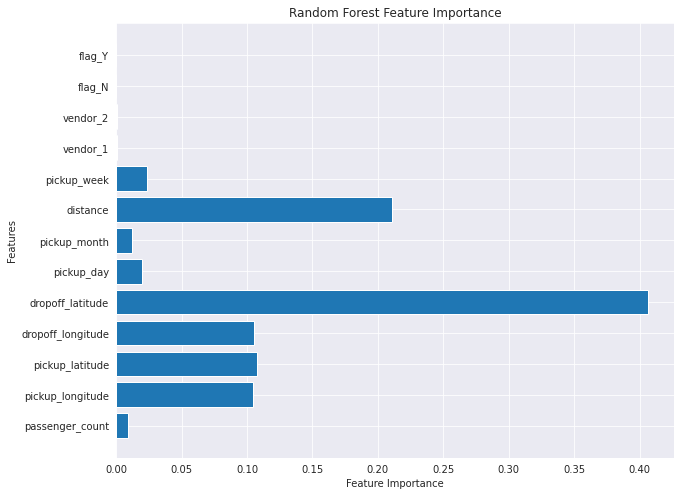

In [108]:
plt.figure(figsize=(10,8))
plt.barh(features_rf, reg.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()